In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


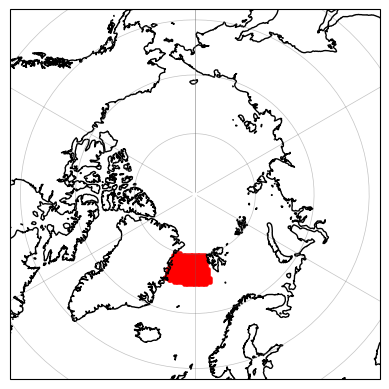

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from src.Enumerations import Month, Season, Experiments, Domains



domain_points = Domains.GREENLAND_SEA.value.get_gridpoint_field(regular=False)
domain_lats = np.array([x.lat for x in domain_points])
domain_lons = np.array([x.lon for x in domain_points])

fig,ax=plt.subplots(1,1,subplot_kw={'projection': ccrs.Orthographic(0,90)})

pole_lon = 0
pole_lat = 6.55
crs_arctic = ccrs.RotatedPole(pole_longitude=pole_lon, pole_latitude=pole_lat)

ax.scatter(domain_lons,domain_lats,s=5,c='r',transform=crs_arctic)

ax.coastlines()
ax.set_extent([-180,180, 58, 90], crs=ccrs.PlateCarree())
ax.gridlines(linewidth=0.5,color='dimgray',alpha=0.4,zorder=2)

In [9]:
from src.GridPoints import GridPoint
import sys
a=GridPoint.grid_field
np.set_printoptions(threshold=sys.maxsize)

In [11]:
GridPoint.regular_lat_grid

array([[47.628674, 47.829224, 48.028698, 48.227085, 48.424366, 48.62053 ,
        48.81556 , 49.00943 , 49.202137, 49.393654, 49.583973, 49.773067,
        49.960926, 50.147526, 50.332855, 50.516895, 50.699623, 50.88102 ,
        51.061073, 51.23976 , 51.41706 , 51.59296 , 51.767433, 51.940464,
        52.11203 , 52.282112, 52.450687, 52.617744, 52.783253, 52.947193,
        53.10955 , 53.270298, 53.429413, 53.58688 , 53.742672, 53.89677 ,
        54.049156, 54.1998  , 54.348682, 54.49578 , 54.641075, 54.784542,
        54.92616 , 55.065903, 55.20375 , 55.33968 , 55.473667, 55.605694,
        55.73573 , 55.863758, 55.989754, 56.113693, 56.235554, 56.355316,
        56.472954, 56.588444, 56.701767, 56.8129  , 56.92182 , 57.028507,
        57.13294 , 57.23509 , 57.334938, 57.43247 , 57.527657, 57.620483,
        57.710926, 57.798965, 57.884583, 57.967754, 58.048466, 58.126698,
        58.20243 , 58.275646, 58.346325, 58.414455, 58.480015, 58.54299 ,
        58.60337 , 58.661133, 58.71626

RegularGridPoint(lat=3, lon=4)

In [138]:
dat1=IVTobj_ls.sel_season(season=Season.SUMMER).get_attributes(attr='duration')##obj_means("size")
dat2=IVTobj_ls.sel_season(season=Season.SUMMER).obj_means(attr='total_IVT')##obj_means("size")


sns.kdeplot(x=np.array(dat1),y=np.array(dat2),label=season_.name,color=bar_colors[i],shade=True,bw_adjust=0.3, clip =((9,80),(0,0.5e5)))
    #sns.histplot(dat,label=season_.name,color=bar_colors[i],bins=100, stat='density')

    

ax.set_xlabel('Object duration [hrs]')
ax.set_ylabel('Probability density')
plt.legend()
plt.grid()
ax.set_xlim(0,200)

In [1]:
%load_ext autoreload
%autoreload 2
from src.GridPoints import *
    

/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
p1= GridPoint(0,1)

TypeError: Can only create Regular-or Rotated Gridpoint objects, no objects of the GridPoint parent class.

In [3]:
p1

GridPoint(lat=0, lon=1)

In [4]:
p2= GridPoint(0,1)

<class 'src.GridPoints.GridPoint'>


In [5]:
id(p1), id(p2)

(140737077784304, 140737077784304)

In [6]:
p3= GridPoint(0,4)

<class 'src.GridPoints.GridPoint'>


In [7]:
id(p3)

140728213598656

In [3]:
reg1 = RegularGridPoint(0,1)
rot1 = RotatedGridPoint(0,1)
rot2 = RotatedGridPoint(0,1)
rot3 = RotatedGridPoint(1,1)

In [4]:
id(reg1), id (rot1)

(140737019942896, 140737019940640)

In [5]:
RegularGridPoint.__dict__

mappingproxy({'__module__': 'src.GridPoints',
              '__doc__': '\n    Class that represents grid points in a regular lon-lat coordinate system.\n    ',
              '_instances': {(0, 1): RegularGridPoint(lat=0, lon=1)},
              '__init__': <function src.GridPoints.RegularGridPoint.__init__(self, lat, lon)>,
              'to_rotated': <function src.GridPoints.RegularGridPoint.to_rotated(self) -> 'RotatedGridPoint'>})

In [6]:
RotatedGridPoint.__dict__

mappingproxy({'__module__': 'src.GridPoints',
              '__doc__': '\n    Class that represents grid points in a rotated coordinate system.\n    ',
              '_instances': {(0, 1): RotatedGridPoint(lat=0, lon=1),
               (1, 1): RotatedGridPoint(lat=1, lon=1)},
              'to_regular': <function src.GridPoints.RotatedGridPoint.to_regular(self) -> 'RegularGridPoint'>})

In [13]:
from abc import ABC
class test(ABC):
    pass

t= test()

In [14]:
t

In [24]:
import numpy as np
from sklearn import decomposition, cluster
import xarray as xr
import os
from src.clustering.clustering_utils import *
from src.Enumerations import Season, Experiments
from src.clustering.cluster_computation import compute_and_save_cluster

In [25]:
exp= Experiments.ICON_NORESM_SSP.value

In [26]:
exp.clustering_data_path
season = Season.DJF
level=70000
year_start = exp.year_start
year_end = exp.year_end
path_in = exp.clustering_data_path
path_out = os.path.dirname(path_in.rstrip('/'))+"/"
file_name = f'{exp.exp_name}_gph{level}_{year_start}_{year_end}_reglonlat_-90_90_20_88_1deg_{season.name}_fldmean_detrend_del29feb_aac.nc'

In [27]:
dat=xr.load_dataset(path_in+file_name)

In [28]:
import pandas as pd
from datetime import datetime
BMU = pd.read_csv("/work/aa0238/a271093/data/clustering/regime_output/BMU/NorESM_ICON_SSP_gph70000_2015_2100_reglonlat_-90_90_20_88_1deg_DJF_fldmean_detrend_del29feb_aac_20PCs_4clusters_Ref_ERA5KmeansPCA.csv")

In [29]:
BMU

,time,cluster_id,cluster_name
0,2015-01-01 12:00:00,3,SCAN
1,2015-01-02 12:00:00,3,SCAN
2,2015-01-03 12:00:00,3,SCAN
3,2015-01-04 12:00:00,3,SCAN
4,2015-01-05 12:00:00,3,SCAN
...,...,...,...
7735,2100-12-27 12:00:00,2,ATL-
7736,2100-12-28 12:00:00,2,ATL-
7737,2100-12-29 12:00:00,0,NAO+
7738,2100-12-30 12:00:00,0,NAO+


In [30]:
time_df = BMU[BMU.cluster_name == "NAO+"].time.values

t = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(time_df)]

time_df

array(['2015-01-26 12:00:00', '2015-01-27 12:00:00',
       '2015-01-28 12:00:00', ..., '2100-12-29 12:00:00',
       '2100-12-30 12:00:00', '2100-12-31 12:00:00'], dtype=object)

In [31]:
time_df[0:4]

array(['2015-01-26 12:00:00', '2015-01-27 12:00:00',
       '2015-01-28 12:00:00', '2015-01-29 12:00:00'], dtype=object)

In [34]:
import xarray as xr
import pandas as pd
from datetime import datetime
import cftime

# Beispiel-Daten mit cftime.DatetimeNoLeap Objekten erstellen
#times = [cftime.DatetimeNoLeap(1984, 1, 1) + pd.Timedelta(days=i) for i in range(10)]
#data = xr.DataArray([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], coords=[times], dims=['time'])

# Das DataArray in ein Dataset umwandeln
#dataset = xr.Dataset({'example_data': data})

# Array mit Datums-Strings
date_strings =list( BMU[BMU.cluster_name == "NAO+"].time.values)

# Konvertiere die Datums-Strings in cftime.DatetimeNoLeap Objekte
cftime_dates = [cftime.DatetimeNoLeap(datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').year,
                                      datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').month,
                                      datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').day,
                                      datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').hour,
                                      datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').minute,
                                      datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S').second)
               for date_string in date_strings]

# Daten auswählen, die zu den Datums-Strings passen
dat_sel = dat.sel(time=cftime_dates)




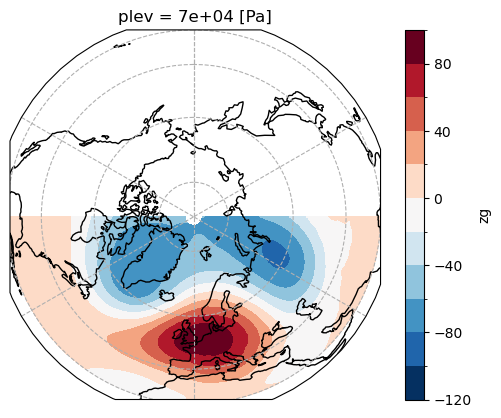

In [35]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.Orthographic(0,90)})

pole_lon = 0
pole_lat = 6.55
crs_arctic = ccrs.RotatedPole(pole_longitude=pole_lon, pole_latitude=pole_lat)
var_plot=np.squeeze(dat_sel.zg.mean('time'))
var_plot.plot.contourf(transform=ccrs.PlateCarree(),levels=np.arange(-120,120,20))#.where(var_plot>0).plot(cmap='RdYlBu_r',norm=LogNorm(),ax=ax,transform=crs_rot)

ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax.gridlines(linestyle='--')
ax.coastlines()

In [60]:
var_plot

<xarray.DataArray 'zg' (lat: 61, lon: 161)> Size: 39kB
array([[ 59.24593   ,  59.867157  ,  60.022472  , ...,  45.994133  ,
         45.931744  ,  45.682186  ],
       [ 61.903675  ,  62.02618   ,  62.05683   , ...,  42.29127   ,
         42.278957  ,  42.229755  ],
       [ 64.8765    ,  64.8765    ,  64.8765    , ...,  38.622414  ,
         38.622414  ,  38.622414  ],
       ...,
       [-10.01754   , -10.080789  , -10.150458  , ...,  -0.73653895,
         -0.7060011 ,  -0.7057256 ],
       [ -8.689869  ,  -8.713353  ,  -8.721742  , ...,  -0.5471538 ,
         -0.51003706,  -0.46628895],
       [ -7.485382  ,  -7.535693  ,  -7.4850082 , ...,  -0.390396  ,
         -0.3318668 ,  -0.27673954]], dtype=float32)
Coordinates:
  * lon      (lon) float64 1kB -90.0 -88.88 -87.75 -86.62 ... 87.75 88.88 90.0
  * lat      (lat) float64 488B 87.54 86.42 85.29 84.17 ... 22.34 21.22 20.09
    plev     float32 4B 7e+04

In [64]:
var_plot

<xarray.DataArray 'zg' (lat: 61, lon: 161)> Size: 39kB
array([[ 59.24593   ,  59.867157  ,  60.022472  , ...,  45.994133  ,
         45.931744  ,  45.682186  ],
       [ 61.903675  ,  62.02618   ,  62.05683   , ...,  42.29127   ,
         42.278957  ,  42.229755  ],
       [ 64.8765    ,  64.8765    ,  64.8765    , ...,  38.622414  ,
         38.622414  ,  38.622414  ],
       ...,
       [-10.01754   , -10.080789  , -10.150458  , ...,  -0.73653895,
         -0.7060011 ,  -0.7057256 ],
       [ -8.689869  ,  -8.713353  ,  -8.721742  , ...,  -0.5471538 ,
         -0.51003706,  -0.46628895],
       [ -7.485382  ,  -7.535693  ,  -7.4850082 , ...,  -0.390396  ,
         -0.3318668 ,  -0.27673954]], dtype=float32)
Coordinates:
  * lon      (lon) float64 1kB -90.0 -88.88 -87.75 -86.62 ... 87.75 88.88 90.0
  * lat      (lat) float64 488B 87.54 86.42 85.29 84.17 ... 22.34 21.22 20.09
    plev     float32 4B 7e+04

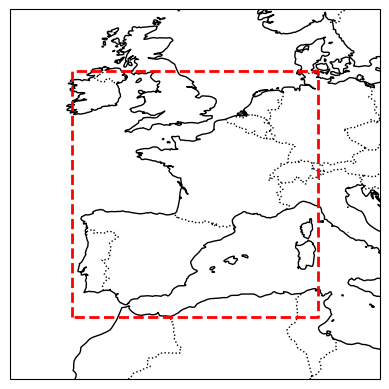

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def add_bounding_box(min_lon, max_lon, min_lat, max_lat):
    """
    Decorator to add a bounding box to an existing Cartopy plot.
    
    Parameters:
    - min_lon: Minimum longitude of the bounding box
    - max_lon: Maximum longitude of the bounding box
    - min_lat: Minimum latitude of the bounding box
    - max_lat: Maximum latitude of the bounding box
    """
    def decorator(plot_func):
        def wrapper(*args, **kwargs):
            # Call the original plot function
            ax = plot_func(*args, **kwargs)
            
            # Add bounding box
            if isinstance(ax, plt.Axes):
                # Plotting the bounding box on the map
                ax.plot([min_lon, min_lon, max_lon, max_lon, min_lon],
                        [min_lat, max_lat, max_lat, min_lat, min_lat],
                        transform=ccrs.PlateCarree(),
                        color='red', linewidth=2, linestyle='--')
                ax.set_extent([min_lon - 5, max_lon + 5, min_lat - 5, max_lat + 5], crs=ccrs.PlateCarree())
            else:
                raise ValueError("The decorated function must return a matplotlib Axes object.")
            
            return ax
        return wrapper
    return decorator

# Beispiel einer bestehenden Plot-Funktion
@add_bounding_box(-10, 10, 35, 55)
def plot_map():
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    return ax

# Verwenden der dekorierten Funktion
plot_map()
plt.show()

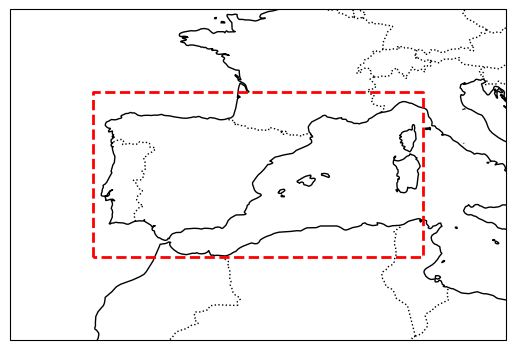

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def add_bounding_box(min_lon, max_lon, min_lat, max_lat):
    """
    Decorator to add a bounding box to an existing Cartopy plot.

    Parameters:
    - min_lon: Minimum longitude of the bounding box
    - max_lon: Maximum longitude of the bounding box
    - min_lat: Minimum latitude of the bounding box
    - max_lat: Maximum latitude of the bounding box
    """
    def decorator(plot_func):
        def wrapper(*args, **kwargs):
            # Call the original plot function with additional bounding box arguments
            ax = plot_func(*args, **kwargs)
            
            # Add bounding box
            if isinstance(ax, plt.Axes):
                # Plotting the bounding box on the map
                ax.plot([min_lon, min_lon, max_lon, max_lon, min_lon],
                        [min_lat, max_lat, max_lat, min_lat, min_lat],
                        transform=ccrs.PlateCarree(),
                        color='red', linewidth=2, linestyle='--')
                ax.set_extent([min_lon - 5, max_lon + 5, min_lat - 5, max_lat + 5], crs=ccrs.PlateCarree())
            else:
                raise ValueError("The decorated function must return a matplotlib Axes object.")
            
            return ax
        return wrapper
    return decorator

# Beispiel einer bestehenden Plot-Funktion
@add_bounding_box(-10, 10, 35, 45)
def plot_map(min_lon, max_lon, min_lat, max_lat):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    return ax

# Verwenden der dekorierten Funktion mit Bounding Box-Koordinaten
plot_map(-20, 20, 30, 80)
plt.show()


In [20]:
from src.Enumerations import Domains

In [25]:
Domains.NORTH_ATLANTIC.value.__dict__

{'south': 40, 'north': 60, 'east': 0, 'west': -60}

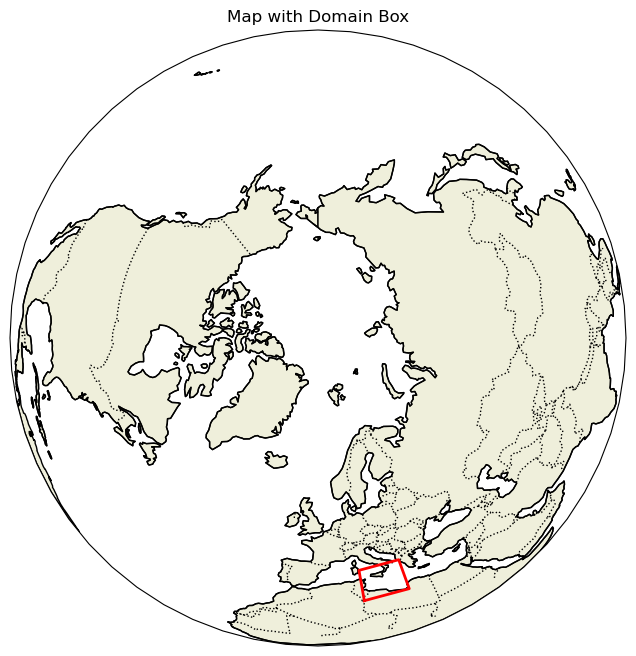

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_with_domain_box(area_extent, domain_extent):
    """
    Plot a map with a domain box over a specified area.

    Parameters:
        area_extent (tuple): Tuple specifying the extent of the map area in the form (min_lon, max_lon, min_lat, max_lat).
        domain_extent (tuple): Tuple specifying the extent of the domain box in the form (min_lon, max_lon, min_lat, max_lat).
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(0,90))

    # Set extent of the map
    ax.set_global()

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')

    # Plot domain box
    min_lon, max_lon, min_lat, max_lat = domain_extent
    ax.plot([min_lon, max_lon, max_lon, min_lon, min_lon], 
            [min_lat, min_lat, max_lat, max_lat, min_lat], 
            color='red', linewidth=2, transform=ccrs.PlateCarree())

    # Add title
    ax.set_title('Map with Domain Box')

    plt.show()

# Beispielaufruf
area_extent = (-180, 180, 58, 90)  # Bereich der Weltkarte
domain_extent = (10, 20, 30, 40)    # Bereich der Domain-Box
plot_with_domain_box(area_extent, domain_extent)

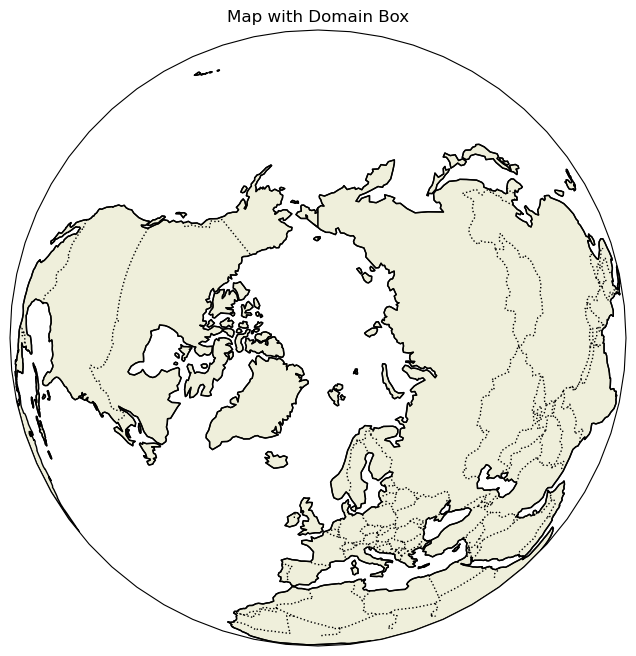

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def plot_with_domain_box(area_extent, domain_extent):
    """
    Plot a map with a domain box over a specified area.

    Parameters:
        area_extent (tuple): Tuple specifying the extent of the map area in the form (min_lon, max_lon, min_lat, max_lat).
        domain_extent (tuple): Tuple specifying the extent of the domain box in the form (min_lon, max_lon, min_lat, max_lat).
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0))

    # Set extent of the map
    ax.set_global()

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')

    # Plot domain box
    min_lon, max_lon, min_lat, max_lat = domain_extent
    box_corners = [
        [min_lon, min_lat],
        [max_lon, min_lat],
        [max_lon, max_lat],
        [min_lon, max_lat],
        [min_lon, min_lat]
    ]
    
    transformed_corners = []
    for lon, lat in box_corners:
        transformed_point = ax.projection.transform_point(lon, lat, ccrs.PlateCarree())
        transformed_corners.append(transformed_point)

    transformed_corners = np.array(transformed_corners)
    
    ax.plot(transformed_corners[:, 0], transformed_corners[:, 1], color='red', linewidth=2, transform=ccrs.Orthographic())

    # Add title
    ax.set_title('Map with Domain Box')

    plt.show()

# Beispielaufruf
area_extent = (-180, 180, -90, 90)  # Bereich der Weltkarte
domain_extent = (10, 20, 30, 40)    # Bereich der Domain-Box
plot_with_domain_box(area_extent, domain_extent)



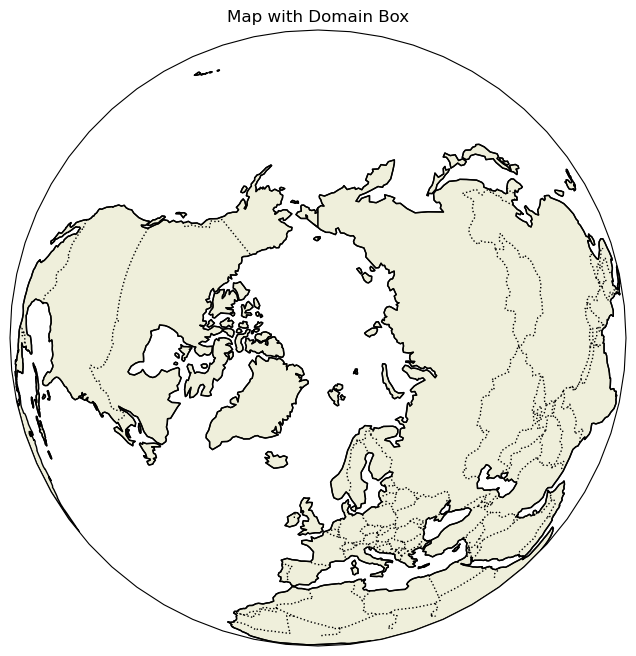

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def plot_with_domain_box(area_extent, domain_extent):
    """
    Plot a map with a domain box over a specified area.

    Parameters:
        area_extent (tuple): Tuple specifying the extent of the map area in the form (min_lon, max_lon, min_lat, max_lat).
        domain_extent (tuple): Tuple specifying the extent of the domain box in the form (min_lon, max_lon, min_lat, max_lat).
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0))

    # Set extent of the map
    ax.set_global()

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')

    # Plot domain box
    min_lon, max_lon, min_lat, max_lat = domain_extent
    box_corners = [
        [min_lon, min_lat],
        [max_lon, min_lat],
        [max_lon, max_lat],
        [min_lon, max_lat],
        [min_lon, min_lat]
    ]
    
    transformed_corners = []
    for lon, lat in box_corners:
        transformed_point = ccrs.PlateCarree().transform_point(lon, lat, ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0))
        transformed_corners.append(transformed_point)

    transformed_corners = np.array(transformed_corners)
    
    ax.plot(transformed_corners[:, 0], transformed_corners[:, 1], color='red', linewidth=2, transform=ccrs.PlateCarree())

    # Add title
    ax.set_title('Map with Domain Box')

    plt.show()

# Beispielaufruf
area_extent = (-180, 180, -90, 90)  # Bereich der Weltkarte
domain_extent = (10, 20, 30, 40)    # Bereich der Domain-Box
plot_with_domain_box(area_extent, domain_extent)


In [2]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os

from src.Corrections import * 
from src.Enumerations import Month, Season,Domains
from src.xarray_util import create_obj_from_dict,  ObjectContainer,  load_tracking_objects
from src.plot_funcs import plot_unstructured_rotated_grid,plot_tracks_rotated_grid


/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:203: AccessorRegistrationWarning: registration of accessor <class 'src.xarray_util.Accessor'> under name 'get' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("get")


## Settings

In [3]:
input_path_ERA5 = '/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/'
input_path_CNRM = '/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control_remapped_3x/'
type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_CNRM = 'MOAPP_ICON_100and85controlperc_remapped_3x'
#input_field_grid= '/work/aa0238/a271093/data/input/IVT_85_percentiles_CNMR_control_3dx3dy.nc'
#GridPoint.input_field_grid = input_field_grid

first_year = 1984
last_year = 1988
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [ ]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5, input_file_name_temp_ERA5, type_, first_year, last_year,load_coordinates=True)
#IVT_objs_CNRM = load_tracking_objects(input_path_CNRM, input_file_name_temp_CNRM, type_, first_year, last_year,load_coordinates=True)

 
    
  

1984-01-01 00:00:00
1984-07-01 00:00:00


In [11]:
import xarray as xr
import numpy as np

In [5]:
reg=xr.load_dataset("/work/aa0238/a271093/scratch/reg.nc").U
gcm=xr.load_dataset("/work/aa0238/a271093/scratch/gcm.nc").ua

In [8]:
reg.values.shape

(365, 582, 577)

In [13]:
a=np.squeeze(gcm.values)-reg.values

In [20]:
a.std()

2.128654

In [ ]:
for j,clus in enumerate(mean_diff.BMU):
        lev=[950,970,990,1010,1030]
        lev=[-20, -10, -5, -3, -2,0, 2, 3, 5, 10, 20]
        lev=[-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6]
        #lev=[-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60]
        plot_dat_ref=frame1.groupby(frame1_u.BMU).mean().sel(BMU=clus)
        plot_dat= mean_diff.sel(BMU=clus)#.groupby(kk.month).mean()
        plot_dat_u= mean_diff_u.sel(BMU=clus)#.groupby(kk.month).mean()
        plot_dat = plot_dat.where(d_up.sel(BMU=clus)*d_low.sel(BMU=clus)>0)
        #plot_dat_u = plot_dat_u.where(d_up_u.sel(BMU=clus)*d_low_u.sel(BMU=clus)>0).fillna(0)
        plot_dat_u = plot_dat_u.where(gg.sel(BMU=clus)>6)

        ax = fig.add_subplot(4,5,j+1+(i*5),projection=ccrs.PlateCarree())
        g=ax.contourf(plot_dat.lon, plot_dat.lat, plot_dat.psl,levels=lev,extend='both',vmin=-6,vmax=6,cmap='seismic',transform=ccrs.PlateCarree())
        plot=ax.quiver(plot_dat_u.lon, plot_dat_u.lat, plot_dat_u.ua_aac.values, plot_dat_u.va_aac.values,units='width',cmap='seismic',scale=35,headwidth=4,transform=ccrs.PlateCarree(),color='green')
        ax.quiverkey(plot,0.9, 1.06, 1, r'$1 \frac{m}{s}$', labelpos='E', fontproperties={'size': font_size*2})
        
        
        ax.set_extent([-90, 90, 90, 20], ccrs.PlateCarree())
        ax.coastlines()

        cbar = plt.colorbar(g,
                            ax=ax,
                            ticks=lev,
                            orientation="horizontal",
                            shrink=1)
        cbar.set_label('SLP difference [hPa]',size=font_size*2.5)
        cbar.ax.tick_params(labelsize=font_size*1.8)

        ax.set_title(clus.values,size=font_size*3)
        #plt.legend()

In [2]:
import numpy as np
x=0
for i in np.arange(1000):
    x +=i

In [4]:
import dask.array as da

# Erstellen eines Dask-Arrays
array = da.arange(1000, chunks=250)

# Berechnung der Summe des Arrays
x = array.sum().compute()

print(x)

499500


In [6]:
from dask.distributed import Client
client = Client(n_workers=2, threads_per_worker=2, memory_limit='1GB')

/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41795 instead
  warnings.warn(


In [19]:
%load_ext autoreload
%autoreload 2
from src.utils import *
from src.GridPoints import *
from src.decorators import measure_time_func_lines
import numpy as np
import datetime
from src.Variable_classes import IWV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import glob
import xarray as xr
files = glob.glob("/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IVTu/*.nc")
b=xr.open_mfdataset("/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IVTu/IVTu_2019010100-2019123123_remapped_3x.nc").load()
b=xr.open_mfdataset(files)

In [2]:
b.sel(time="1979-01-01T02:00:00").IVTu.values.shape
c=b.sel(time =a['400100']['times']).to_dict()

NameError: name 'a' is not defined

In [ ]:
a= load_pkl("/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/IVT_MOAPP_ERA5_100and85controlperc_remapped_3x_2019_01_01-2019_07_01_corrected")

In [29]:
b.sel(time=slice(datetime.datetime(2019, 1, 6, 8, 0),datetime.datetime(2019, 1, 6, 17, 0))).load()


<xarray.Dataset> Size: 14MB
Dimensions:       (time: 10, rlat: 194, rlon: 193, nv: 4)
Coordinates:
  * time          (time) datetime64[ns] 80B 2019-01-06T08:00:00 ... 2019-01-0...
    lon           (rlat, rlon) float32 150kB 137.6 137.8 138.1 ... -39.35 -39.62
    lat           (rlat, rlon) float32 150kB 47.63 47.83 48.03 ... 52.85 52.66
  * rlon          (rlon) float32 772B -29.9 -29.6 -29.3 -29.0 ... 27.1 27.4 27.7
  * rlat          (rlat) float32 776B -24.2 -23.9 -23.6 -23.3 ... 33.1 33.4 33.7
Dimensions without coordinates: nv
Data variables:
    lon_bnds      (time, rlat, rlon, nv) float32 6MB 137.6 137.7 ... -39.51
    lat_bnds      (time, rlat, rlon, nv) float32 6MB 47.56 47.63 ... 52.6 52.66
    rotated_pole  (time) |S1 10B b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
    IVTu          (time, rlat, rlon) float32 1MB 9.754 10.16 ... 69.53 71.51
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu Mar 28 11:23:37 2024: cdo -remapbil,/work/aa0238/a27109...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

In [111]:
a['400010']['times']

array([datetime.datetime(2019, 1, 6, 8, 0),
       datetime.datetime(2019, 1, 6, 9, 0),
       datetime.datetime(2019, 1, 6, 10, 0),
       datetime.datetime(2019, 1, 6, 11, 0),
       datetime.datetime(2019, 1, 6, 12, 0),
       datetime.datetime(2019, 1, 6, 13, 0),
       datetime.datetime(2019, 1, 6, 14, 0),
       datetime.datetime(2019, 1, 6, 15, 0),
       datetime.datetime(2019, 1, 6, 16, 0),
       datetime.datetime(2019, 1, 6, 17, 0),
       datetime.datetime(2019, 1, 6, 18, 0),
       datetime.datetime(2019, 1, 6, 19, 0),
       datetime.datetime(2019, 1, 6, 20, 0),
       datetime.datetime(2019, 1, 6, 21, 0),
       datetime.datetime(2019, 1, 6, 22, 0),
       datetime.datetime(2019, 1, 6, 23, 0),
       datetime.datetime(2019, 1, 7, 0, 0),
       datetime.datetime(2019, 1, 7, 1, 0),
       datetime.datetime(2019, 1, 7, 2, 0),
       datetime.datetime(2019, 1, 7, 3, 0),
       datetime.datetime(2019, 1, 7, 4, 0),
       datetime.datetime(2019, 1, 7, 5, 0)], dtype=object)

In [22]:
@measure_time_func_lines
def get_var_field(key, dict_, var_dataset,var_name):


    lat_idx_slice = dict_[key]["lat_idx_slice"]
    lon_idx_slice = dict_[key]["lon_idx_slice"]

    lat_slice = GridPoint.rotated_lat_grid[lat_idx_slice, lon_idx_slice]
    lon_slice = GridPoint.rotated_lon_grid[lat_idx_slice, lon_idx_slice]
    
    var_slice_temp = getattr(var_dataset.sel(time = dict_[key]["times"]), var_name)
    var_slice =var_slice_temp.values[:,lat_idx_slice, lon_idx_slice]

    indices = np.argwhere(~np.isnan(dict_[key]["data_slice"]))
    time_steps = np.unique(indices[:, 0])

    
    ls = []
    for tstep in time_steps:
        idx = indices[indices[:, 0] == tstep][:, 1:]
        #print (idx)

        sub_ls_lat = [lat_slice[tuple(x)] for x in idx]
        sub_ls_lon = [lon_slice[tuple(x)] for x in idx]
        sub_ls_var = [var_slice[tstep,x[0],x[1]] for x in idx]

        sub_dict = {
            RotatedGridPoint(lat, lon): str_to_variable_class(var_name)(var) for lat, lon, var in zip(sub_ls_lat, sub_ls_lon,sub_ls_var)
        }

        ls.append(sub_dict)
    return np.array(ls, dtype="object")
    #return np.array(sub_dict, dtype="object")

    #return lat_slice, lon_slice, var_slice

In [24]:
e=get_var_field('400009', a,b, var_name="IVTu")

Timer unit: 1e-09 s

Total time: 0.0137487 s
File: /tmp/ipykernel_235929/2521978290.py
Function: get_var_field at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           @measure_time_func_lines
     2                                           def get_var_field(key, dict_, var_dataset,var_name):
     3                                           
     4                                           
     5         1       2530.0   2530.0      0.0      lat_idx_slice = dict_[key]["lat_idx_slice"]
     6         1        330.0    330.0      0.0      lon_idx_slice = dict_[key]["lon_idx_slice"]
     7                                           
     8         1       5631.0   5631.0      0.0      lat_slice = GridPoint.rotated_lat_grid[lat_idx_slice, lon_idx_slice]
     9         1       1320.0   1320.0      0.0      lon_slice = GridPoint.rotated_lon_grid[lat_idx_slice, lon_idx_slice]
    10                                             

In [119]:
getattr(module, "IWV")

NameError: name 'module' is not defined

In [25]:
e

array([{RotatedGridPoint(lat=21.700000762939453, lon=23.799999237060547): IVTu(value=-56.0), RotatedGridPoint(lat=22.0, lon=23.799999237060547): IVTu(value=-54.0)},
       {RotatedGridPoint(lat=20.799999237060547, lon=23.5): IVTu(value=-62.0), RotatedGridPoint(lat=21.100000381469727, lon=23.5): IVTu(value=-61.0), RotatedGridPoint(lat=21.399999618530273, lon=23.5): IVTu(value=-58.0), RotatedGridPoint(lat=21.399999618530273, lon=23.799999237060547): IVTu(value=-53.0), RotatedGridPoint(lat=21.700000762939453, lon=23.5): IVTu(value=-56.0), RotatedGridPoint(lat=21.700000762939453, lon=23.799999237060547): IVTu(value=-53.0), RotatedGridPoint(lat=22.0, lon=23.5): IVTu(value=-52.0), RotatedGridPoint(lat=22.0, lon=23.799999237060547): IVTu(value=-52.0), RotatedGridPoint(lat=22.299999237060547, lon=23.799999237060547): IVTu(value=-50.0), RotatedGridPoint(lat=22.299999237060547, lon=24.100000381469727): IVTu(value=-43.0), RotatedGridPoint(lat=22.600000381469727, lon=23.799999237060547): IVTu(valu

In [74]:
la[(1,2)]

6.4

In [120]:
from src.utils import str_to_class

In [122]:
str_to_class('IWV')

AttributeError: module 'src.utils' has no attribute 'IWV'

In [123]:
import sys

In [125]:
sys.modules[__name__]

<module '__main__'>

In [7]:
a=globals()["IWV"](7.7)

In [8]:
a

IWV(value=8.0)

In [4]:
from src.utils import (
    create_datetime_lists,
    get_datetime_str,
    load_pkl,
    save_as_pkl,
    str_to_variable_class,
)
first_year=1979
last_year=1983


start_date_list, end_date_list = create_datetime_lists(
        first_year, last_year, months=6, correct_last_endtime=False
    )

In [5]:
start_date_list

[datetime.datetime(1979, 1, 1, 0, 0),
 datetime.datetime(1979, 7, 1, 0, 0),
 datetime.datetime(1980, 1, 1, 0, 0),
 datetime.datetime(1980, 7, 1, 0, 0),
 datetime.datetime(1981, 1, 1, 0, 0),
 datetime.datetime(1981, 7, 1, 0, 0),
 datetime.datetime(1982, 1, 1, 0, 0),
 datetime.datetime(1982, 7, 1, 0, 0)]

In [9]:
from dateutil.relativedelta import relativedelta
end_date_list[1] + relativedelta(months=1)

datetime.datetime(1980, 2, 1, 0, 0)

In [10]:
end_date_list[1]

datetime.datetime(1980, 1, 1, 0, 0)

In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os

from src.utils import * 
from src.Corrections import * 
from src.Enumerations import Month, Season, Experiments, Domains
from src.xarray_util import create_obj_from_dict,  ObjectContainer,  load_tracking_objects
from src.plot_funcs import plot_unstructured_rotated_grid, plot_contourf_rotated_grid


/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
/work/aa0238/a271093/Scripts/MOAAP/src/xarray_util.py:26: AccessorRegistrationWarning: registration of accessor <class 'src.xarray_util.Accessor'> under name 'get' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("get")


## Settings

In [2]:
exp_ICON_ERA5=Experiments.ICON_ERA5.value
exp_ERA5=Experiments.ERA5.value

input_path_ICON_ERA5= exp_ICON_ERA5.path_IVT_tracking
input_path_ERA5= exp_ERA5.path_IVT_tracking


type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_ICON_ERA5 = 'MOAPP_ICON_ERA5_100and85ERA5perc_remapped_3x'

first_year = 1979
last_year = 1980
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [6]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5,
                                      input_file_name_temp_ERA5,
                                      type_,
                                      first_year,
                                      last_year,
                                      load_coordinates=True,
                                      compute_hist = False,
                                      #compute_hist = False,
                                      exp=exp_ERA5,
                                      var_names_ls = ["IVT","IWV"],
                                      var_paths_ls = ["/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IVT/",#,
                                                      "/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IWV/"]
                                      
                                      )

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/Object_container_1979-1980_IVT_IWV exists. Loading...


In [15]:
a=IVT_objs_ERA5[1].isel(times = slice(1,2)).IWV.values.item()

In [71]:
from src.Variable_classes import *

def calculate_variable_sum(
    objs: ObjectContainer, attr, average =False, normalization_factor: float = 1
) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Calculate the average ellapsed time an object needs to reach a certain grid point

    Args:
        objs (ObjectContainer): IVT Objects
        normalization_factor (float, optional): Factor that scales the average ellapsed time returned (e.g. to days). Defaults to 1.

    Returns:
        tuple[np.ndarray, np.ndarray, np.ndarray]: lat, lon, averaged ellapsed time
    """

    # initialize counter with all grid point counts set to zero
    counter_init_dict = dict.fromkeys(RotatedGridPoint.get_all_gridpoints(), 0)
    #grid_point_counter_time = Counter(counter_init_dict)
    grid_point_counter_normal = Counter(counter_init_dict)
    variable_dict = counter_init_dict

    # iterate over all objects
    for idx in range(len(objs)):
        points = objs[idx].gridpoints.values
        variable = getattr(objs[idx],attr).values

        # iterate over all time steps of object
        for tstep in range(len(points)):
            


            
            # save the ellapsed time the object needed to reach the grid points
            #grid_point_counter_time.update(points[j] * (j + 1))

            # count the absolute number of grid point occurrences
            grid_point_counter_normal.update(points[tstep])

            for i,point in enumerate(points[tstep]):
                variable_dict[point] += variable[tstep][i]

    z =list(variable_dict.values())

    z = np.array([x.value if isinstance(x, IWV) else x for x in z])
    

    grid_point_ls = list(grid_point_counter_normal.keys())

    lat = np.array([x.lat for x in grid_point_ls])
    lon = np.array([x.lon for x in grid_point_ls])          
    
    return lon, lat, z   

In [ ]:
             
            

    grid_point_ls = list(grid_point_counter_normal.keys())

    z_time = np.array(list(grid_point_counter_time.values()))
    z_normal = np.array(list(grid_point_counter_normal.values()))

    # compute the average time from the sumed up times and the average number of grid points occurrences
    z = np.array(
        [
            i / j / normalization_factor if j != 0 else -20
            for i, j in zip(z_time, z_normal)
        ]
    )

    lat = np.array([x.lat for x in grid_point_ls])
    lon = np.array([x.lon for x in grid_point_ls])

    return lon, lat, z

In [1]:
from src.utils import *

b=IVT_objs_ERA5.seltimesteps(slice(0,1))

/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


NameError: name 'IVT_objs_ERA5' is not defined

In [ ]:
lon,lat,d=calculate_variable_sum(b,"IWV")

In [18]:
a=IVT_objs_ERA5[1].isel(times = slice(1,2)).IWV.values

In [22]:
u={1:2, 3:3,2:4}

In [78]:
from src.utils import *


In [ ]:
d

In [50]:
d[0].value

277.0

In [63]:
d[0].value

277.0